In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncuExtraGrand/'
npz_name = 'Incucyte256.npz'
npz_val_name = 'Incucyte256Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd38ExtraGRAND.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 256
imagey = 256

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=10, box_vector=2, categories=2, depth=38, epochs=250, gridx=1, gridy=1, imagex=256, imagey=256, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd38ExtraGRAND.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataIncuExtraGrand/', npz_name='Incucyte256.npz', npz_val_name='Incucyte256Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 3914
image size (2D):		 (256, 256)
axes:				 SXYC
channels in / out:		 1
number of  images:	 207
image size (2D):		 (256, 256)
axes:				 SXYC
channels in / out:		 1
loading weights
(3914, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3914 samples, validate on 207 samples
Epoch 1/250
3914/3914 [==============================] - 188s 48ms/step - loss: 0.4051 - acc: 0.9951 - val_loss: 0.5335 - val_acc: 0.9710

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5334756850908344, 'val_acc': 0.9710144858429397, 'loss': 0.4050650572252931, 'acc': 0.9951456299105894, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

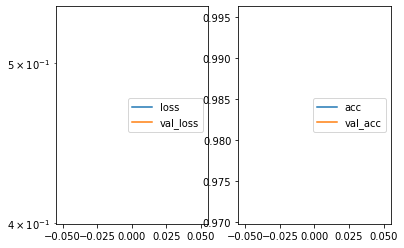

Predicted cell: Cells Probability: [[0.9820758]]
True Cell type: Cells
x [[0.37863964]]
True positional value x 0.5390625
y [[0.6361496]]
True positional value y 0.4609375


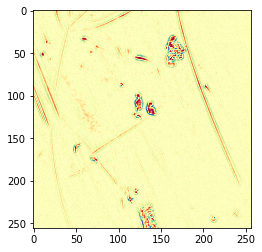

Epoch 2/250
3914/3914 [==============================] - 188s 48ms/step - loss: 0.4018 - acc: 0.9949 - val_loss: 0.5448 - val_acc: 0.9710

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5447903396426768, 'val_acc': 0.9710144858429397, 'loss': 0.401795098305845, 'acc': 0.9948901367479889, 'lr': 1e-06}


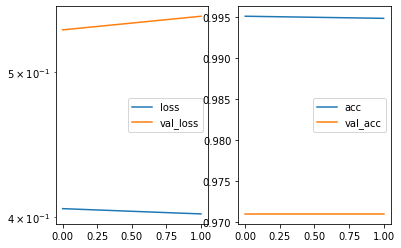

Predicted cell: Cells Probability: [[0.79548836]]
True Cell type: Cells
x [[0.41189152]]
True positional value x 0.4609375
y [[0.3345821]]
True positional value y 0.5390625


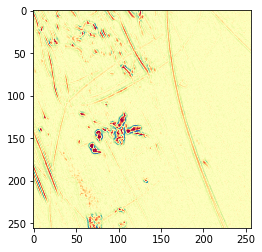

Epoch 3/250
3914/3914 [==============================] - 189s 48ms/step - loss: 0.4018 - acc: 0.9967 - val_loss: 0.5277 - val_acc: 0.9758

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5276764781002837, 'val_acc': 0.9758454048691164, 'loss': 0.40178178362719674, 'acc': 0.9966785890384785, 'lr': 1e-06}


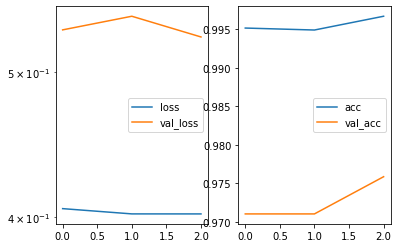

Predicted cell: Cells Probability: [[0.9948966]]
True Cell type: Cells
x [[0.28951797]]
True positional value x 0.5
y [[0.6652373]]
True positional value y 0.5390625


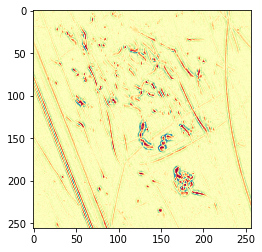

Epoch 4/250
3914/3914 [==============================] - 187s 48ms/step - loss: 0.3995 - acc: 0.9959 - val_loss: 0.5432 - val_acc: 0.9758

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5431539846791161, 'val_acc': 0.9758454048691164, 'loss': 0.3995292630802324, 'acc': 0.9959121093983911, 'lr': 1e-06}


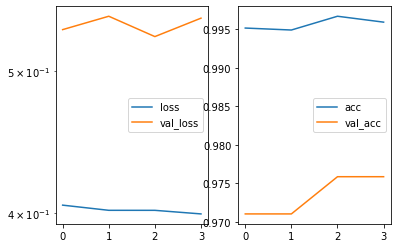

Predicted cell: Cells Probability: [[0.99959904]]
True Cell type: Cells
x [[0.34413487]]
True positional value x 0.4609375
y [[0.46580192]]
True positional value y 0.4609375


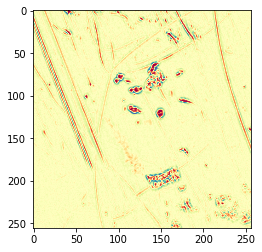

Epoch 5/250
3914/3914 [==============================] - 187s 48ms/step - loss: 0.3927 - acc: 0.9964 - val_loss: 0.5202 - val_acc: 0.9758

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5202157072686918, 'val_acc': 0.9758454048691164, 'loss': 0.39274050009817146, 'acc': 0.9964230957235922, 'lr': 1e-06}


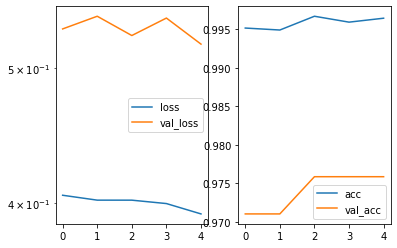

Predicted cell: Cells Probability: [[0.99961627]]
True Cell type: Cells
x [[0.5640208]]
True positional value x 0.5390625
y [[0.61517]]
True positional value y 0.5390625


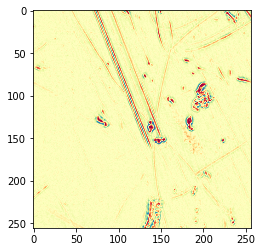

Epoch 6/250
3914/3914 [==============================] - 185s 47ms/step - loss: 0.3866 - acc: 0.9974 - val_loss: 0.5232 - val_acc: 0.9758

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5232486337567297, 'val_acc': 0.9758454048691164, 'loss': 0.3866133275053973, 'acc': 0.9974450683739944, 'lr': 1e-06}


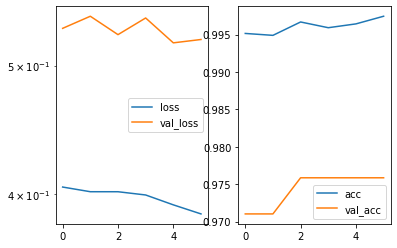

Predicted cell: Cells Probability: [[0.99850863]]
True Cell type: Cells
x [[0.63183665]]
True positional value x 0.4609375
y [[0.32144853]]
True positional value y 0.5390625


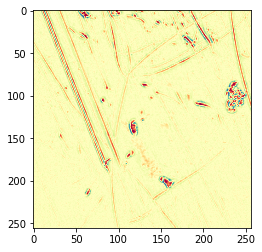

Epoch 7/250
3914/3914 [==============================] - 177s 45ms/step - loss: 0.3819 - acc: 0.9974 - val_loss: 0.5147 - val_acc: 0.9807

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5147335638746547, 'val_acc': 0.9806763238952931, 'loss': 0.381875400343414, 'acc': 0.9974450683739944, 'lr': 1e-06}


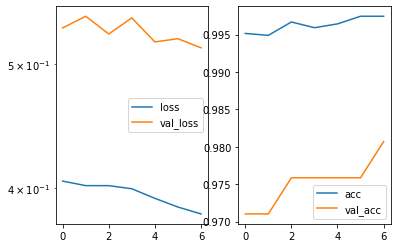

Predicted cell: Cells Probability: [[0.999233]]
True Cell type: Cells
x [[0.4475511]]
True positional value x 0.4609375
y [[0.51688117]]
True positional value y 0.5


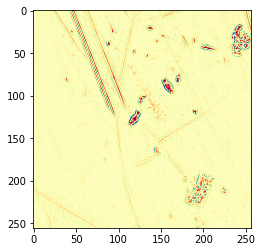

Epoch 8/250
3914/3914 [==============================] - 174s 44ms/step - loss: 0.3779 - acc: 0.9977 - val_loss: 0.5187 - val_acc: 0.9807

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5186522372678858, 'val_acc': 0.9806763238952931, 'loss': 0.37788754154908516, 'acc': 0.997700561536595, 'lr': 1e-06}


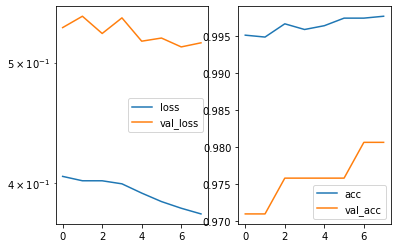

Predicted cell: Cells Probability: [[0.9995321]]
True Cell type: Cells
x [[0.5135754]]
True positional value x 0.5
y [[0.43966722]]
True positional value y 0.5


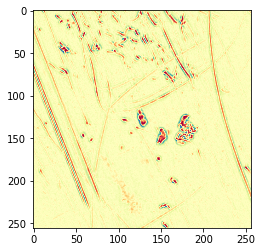

Epoch 9/250
3914/3914 [==============================] - 179s 46ms/step - loss: 0.3746 - acc: 0.9982 - val_loss: 0.5103 - val_acc: 0.9807

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5102763727379306, 'val_acc': 0.9806763238952931, 'loss': 0.3745873051147773, 'acc': 0.9982115478617961, 'lr': 1e-06}


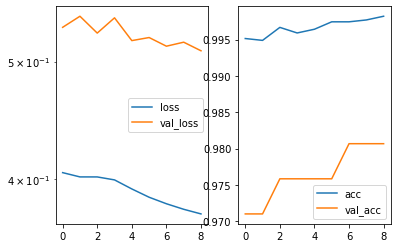

Predicted cell: Cells Probability: [[0.9984687]]
True Cell type: Cells
x [[0.40903208]]
True positional value x 0.5
y [[0.4697135]]
True positional value y 0.4609375


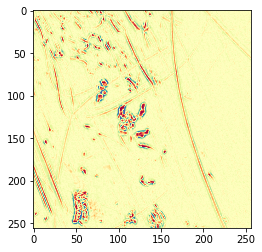

Epoch 10/250
3914/3914 [==============================] - 196s 50ms/step - loss: 0.3735 - acc: 0.9982 - val_loss: 0.5087 - val_acc: 0.9807

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5087062252892388, 'val_acc': 0.9806763238952931, 'loss': 0.3735484547102153, 'acc': 0.9982115478617961, 'lr': 1e-06}


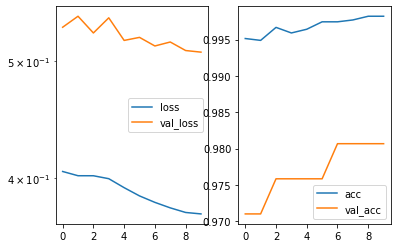

Predicted cell: Normal Probability: [[0.8788921]]
True Cell type: Normal
x [[0.32702142]]
True positional value x 0.5
y [[0.4896114]]
True positional value y 0.5


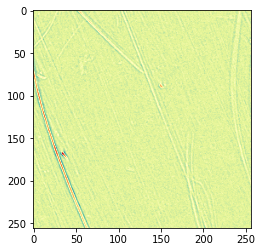

Epoch 11/250
3914/3914 [==============================] - 188s 48ms/step - loss: 0.3726 - acc: 0.9980 - val_loss: 0.5053 - val_acc: 0.9855

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5053276490186147, 'val_acc': 0.9855072429214699, 'loss': 0.3725854492211866, 'acc': 0.9979560546991956, 'lr': 1e-06}


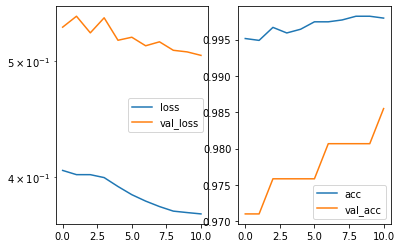

Predicted cell: Cells Probability: [[0.99998415]]
True Cell type: Cells
x [[0.2744633]]
True positional value x 0.5
y [[0.46042216]]
True positional value y 0.5


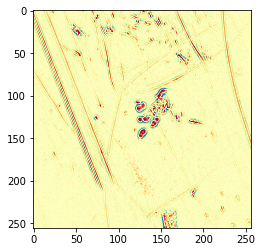

Epoch 12/250
3914/3914 [==============================] - 186s 47ms/step - loss: 0.3715 - acc: 0.9985 - val_loss: 0.5011 - val_acc: 0.9855

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5011462980998311, 'val_acc': 0.9855072429214699, 'loss': 0.37149431882735473, 'acc': 0.9984670410243967, 'lr': 1e-06}


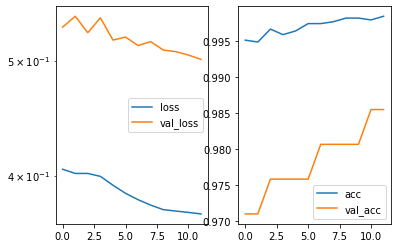

Predicted cell: Cells Probability: [[0.9959006]]
True Cell type: Cells
x [[0.5655151]]
True positional value x 0.4609375
y [[0.37283415]]
True positional value y 0.4609375


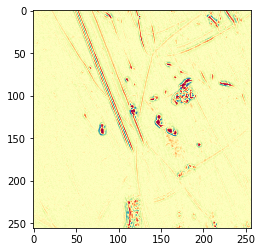

Epoch 13/250
3914/3914 [==============================] - 186s 47ms/step - loss: 0.3699 - acc: 0.9985 - val_loss: 0.5069 - val_acc: 0.9807

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.5068928679982245, 'val_acc': 0.9806763238952931, 'loss': 0.3698613907405169, 'acc': 0.9984670410243967, 'lr': 1e-06}


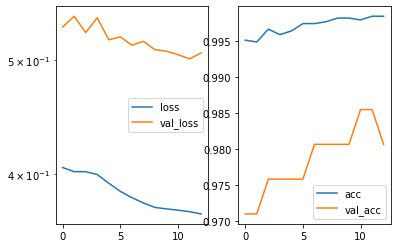

Predicted cell: Cells Probability: [[0.99978095]]
True Cell type: Cells
x [[0.54112893]]
True positional value x 0.5390625
y [[0.5635465]]
True positional value y 0.4609375


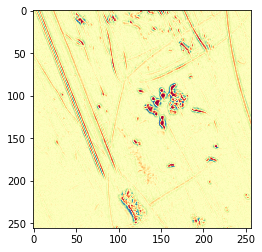

Epoch 14/250
3914/3914 [==============================] - 182s 46ms/step - loss: 0.3677 - acc: 0.9985 - val_loss: 0.5009 - val_acc: 0.9855

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.500908670074122, 'val_acc': 0.9855072429214699, 'loss': 0.36770574450797433, 'acc': 0.9984670410243967, 'lr': 1e-06}


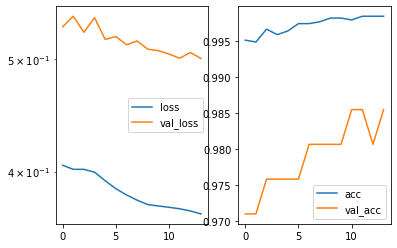

Predicted cell: Cells Probability: [[0.9844379]]
True Cell type: Cells
x [[0.5395751]]
True positional value x 0.5
y [[0.6713588]]
True positional value y 0.5390625


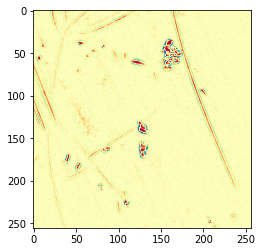

Epoch 15/250
3914/3914 [==============================] - 183s 47ms/step - loss: 0.3662 - acc: 0.9990 - val_loss: 0.5002 - val_acc: 0.9855

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.500167781604085, 'val_acc': 0.9855072429214699, 'loss': 0.3661665527809623, 'acc': 0.9989780273495977, 'lr': 1e-06}


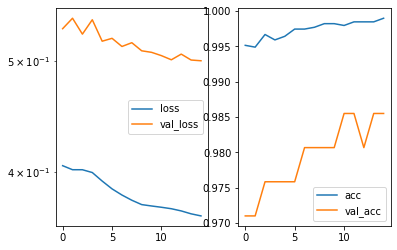

Predicted cell: Cells Probability: [[0.9996903]]
True Cell type: Cells
x [[0.623517]]
True positional value x 0.5390625
y [[0.35896185]]
True positional value y 0.4609375


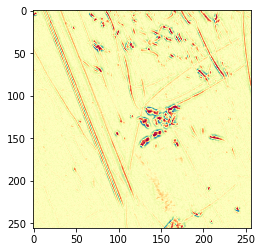

Epoch 16/250
3914/3914 [==============================] - 185s 47ms/step - loss: 0.3649 - acc: 0.9990 - val_loss: 0.4999 - val_acc: 0.9855

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49990310516334385, 'val_acc': 0.9855072429214699, 'loss': 0.3648612109080954, 'acc': 0.9989780273495977, 'lr': 1e-06}


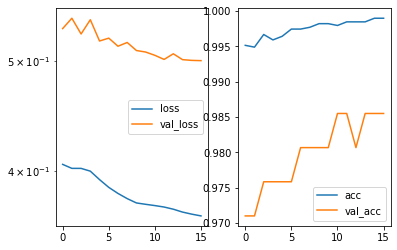

Predicted cell: Cells Probability: [[0.95813465]]
True Cell type: Cells
x [[0.6148669]]
True positional value x 0.5
y [[0.52566546]]
True positional value y 0.5390625


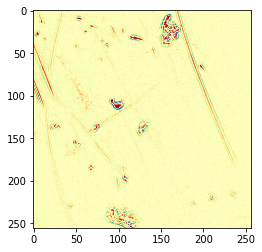

Epoch 17/250
3914/3914 [==============================] - 182s 47ms/step - loss: 0.3620 - acc: 0.9992 - val_loss: 0.4965 - val_acc: 0.9855

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49649108694371397, 'val_acc': 0.9855072429214699, 'loss': 0.36200418597773504, 'acc': 0.9992335205121984, 'lr': 1e-06}


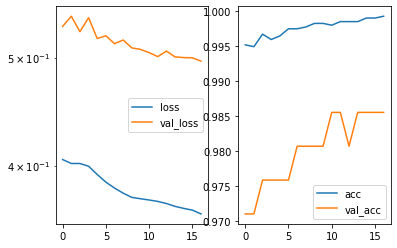

Predicted cell: Cells Probability: [[0.9999783]]
True Cell type: Cells
x [[0.35910952]]
True positional value x 0.4609375
y [[0.42788783]]
True positional value y 0.4609375


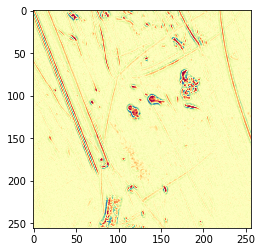

Epoch 18/250
3914/3914 [==============================] - 183s 47ms/step - loss: 0.3620 - acc: 0.9987 - val_loss: 0.4965 - val_acc: 0.9855

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49647542747898377, 'val_acc': 0.9855072429214699, 'loss': 0.36202088679107525, 'acc': 0.9987225341869972, 'lr': 1e-06}


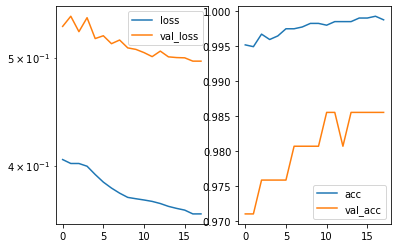

Predicted cell: Cells Probability: [[0.9987344]]
True Cell type: Cells
x [[0.53601336]]
True positional value x 0.5390625
y [[0.4367789]]
True positional value y 0.5390625


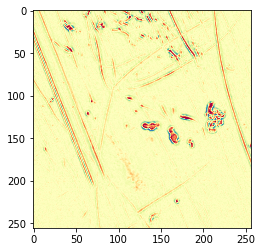

Epoch 19/250
3914/3914 [==============================] - 180s 46ms/step - loss: 0.3605 - acc: 0.9990 - val_loss: 0.4980 - val_acc: 0.9855

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49800592804876503, 'val_acc': 0.9855072429214699, 'loss': 0.3604875716647751, 'acc': 0.9989780273495977, 'lr': 1e-06}


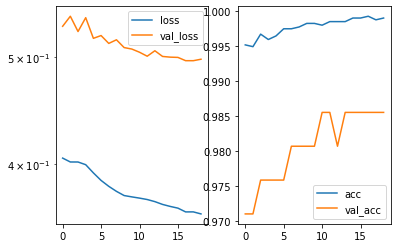

Predicted cell: Cells Probability: [[0.84523207]]
True Cell type: Normal
x [[0.620454]]
True positional value x 0.5
y [[0.7515405]]
True positional value y 0.5


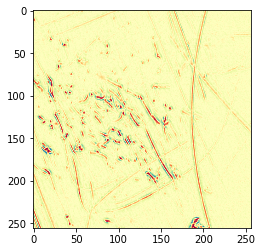

Epoch 20/250
3914/3914 [==============================] - 181s 46ms/step - loss: 0.3587 - acc: 0.9992 - val_loss: 0.4978 - val_acc: 0.9855

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4978064223764023, 'val_acc': 0.9855072429214699, 'loss': 0.3587150556217607, 'acc': 0.9992335205121984, 'lr': 1e-06}


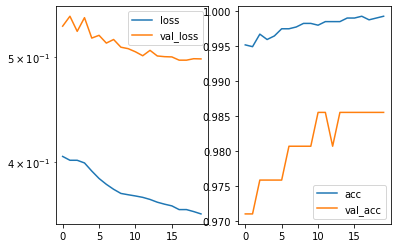

Predicted cell: Cells Probability: [[0.9999385]]
True Cell type: Cells
x [[0.6641495]]
True positional value x 0.4609375
y [[0.5868527]]
True positional value y 0.4609375


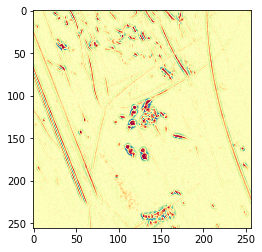

Epoch 21/250
3914/3914 [==============================] - 191s 49ms/step - loss: 0.3578 - acc: 0.9992 - val_loss: 0.4957 - val_acc: 0.9855

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49573528896207397, 'val_acc': 0.9855072429214699, 'loss': 0.35784976874984037, 'acc': 0.9992335205121984, 'lr': 1e-06}


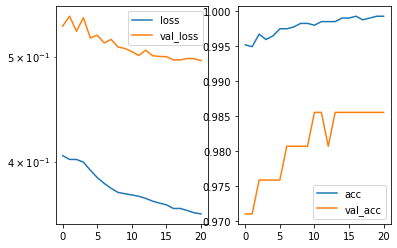

Predicted cell: Cells Probability: [[0.999905]]
True Cell type: Cells
x [[0.60394865]]
True positional value x 0.5390625
y [[0.41922858]]
True positional value y 0.5390625


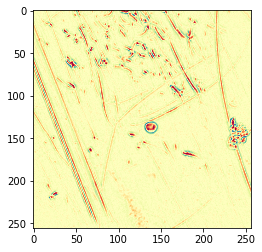

Epoch 22/250
3914/3914 [==============================] - 186s 48ms/step - loss: 0.3573 - acc: 0.9990 - val_loss: 0.4910 - val_acc: 0.9855

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49096836545617106, 'val_acc': 0.9855072429214699, 'loss': 0.3573008374590379, 'acc': 0.9989780273495977, 'lr': 1e-06}


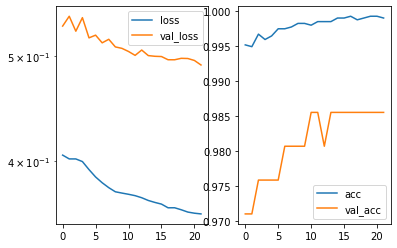

Predicted cell: Cells Probability: [[0.9928924]]
True Cell type: Cells
x [[0.5582838]]
True positional value x 0.5390625
y [[0.47020432]]
True positional value y 0.5


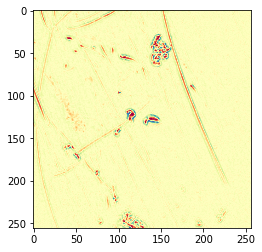

Epoch 23/250
3914/3914 [==============================] - 186s 47ms/step - loss: 0.3567 - acc: 0.9995 - val_loss: 0.4922 - val_acc: 0.9855

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49221738813004057, 'val_acc': 0.9855072429214699, 'loss': 0.35665233134005103, 'acc': 0.9994890136747989, 'lr': 1e-06}


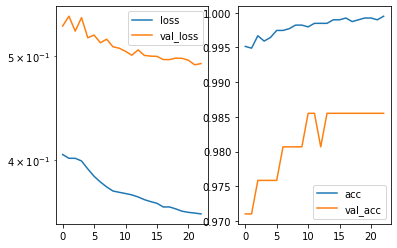

Predicted cell: Cells Probability: [[0.99993336]]
True Cell type: Cells
x [[0.3881759]]
True positional value x 0.4609375
y [[0.45006892]]
True positional value y 0.5


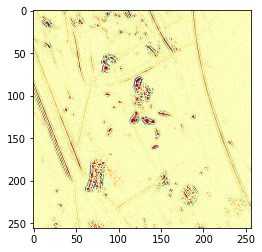

Epoch 24/250
3914/3914 [==============================] - 184s 47ms/step - loss: 0.3559 - acc: 0.9995 - val_loss: 0.4977 - val_acc: 0.9855

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49769975856882365, 'val_acc': 0.9855072429214699, 'loss': 0.35587725972239925, 'acc': 0.9994890136747989, 'lr': 1e-06}


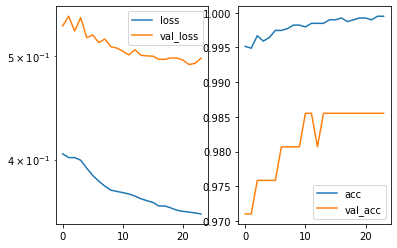

Predicted cell: Cells Probability: [[0.99998796]]
True Cell type: Cells
x [[0.68622255]]
True positional value x 0.5
y [[0.264093]]
True positional value y 0.5


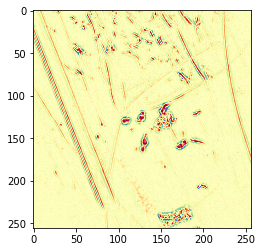

Epoch 25/250
3914/3914 [==============================] - 179s 46ms/step - loss: 0.3551 - acc: 0.9992 - val_loss: 0.4908 - val_acc: 0.9855

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.49077363981716876, 'val_acc': 0.9855072429214699, 'loss': 0.3551309159140716, 'acc': 0.9992335205121984, 'lr': 1e-06}


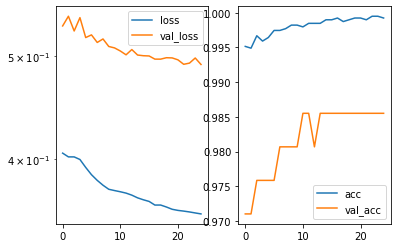

Predicted cell: Cells Probability: [[0.99988115]]
True Cell type: Cells
x [[0.61184514]]
True positional value x 0.5
y [[0.65965754]]
True positional value y 0.5


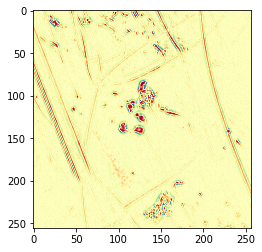

Epoch 26/250
3914/3914 [==============================] - 179s 46ms/step - loss: 0.3553 - acc: 0.9992 - val_loss: 0.4897 - val_acc: 0.9855

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.48973942594827663, 'val_acc': 0.9855072429214699, 'loss': 0.35531189227567134, 'acc': 0.9992335205121984, 'lr': 1e-06}


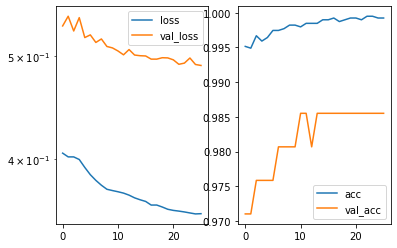

Predicted cell: Cells Probability: [[0.99625885]]
True Cell type: Cells
x [[0.41486424]]
True positional value x 0.4609375
y [[0.32606447]]
True positional value y 0.5390625


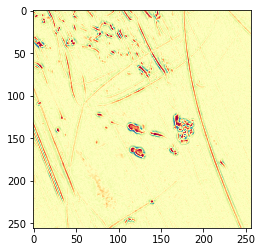

Epoch 27/250
3914/3914 [==============================] - 173s 44ms/step - loss: 0.3550 - acc: 0.9992 - val_loss: 0.4877 - val_acc: 0.9855

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4876652842270579, 'val_acc': 0.9855072429214699, 'loss': 0.3549634696393215, 'acc': 0.9992335205121984, 'lr': 1e-06}


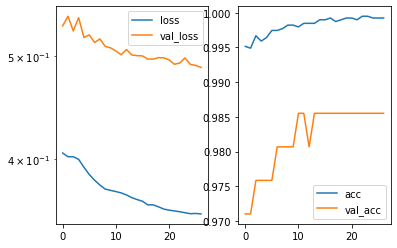

Predicted cell: Cells Probability: [[0.9998504]]
True Cell type: Cells
x [[0.66160494]]
True positional value x 0.5
y [[0.36271033]]
True positional value y 0.5390625


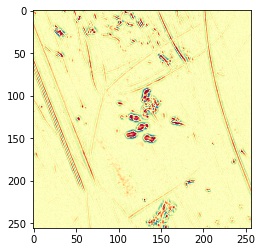

Epoch 28/250
3914/3914 [==============================] - 176s 45ms/step - loss: 0.3546 - acc: 0.9995 - val_loss: 0.4913 - val_acc: 0.9855

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4913271724601875, 'val_acc': 0.9855072429214699, 'loss': 0.3546330554636388, 'acc': 0.9994890136747989, 'lr': 1e-06}


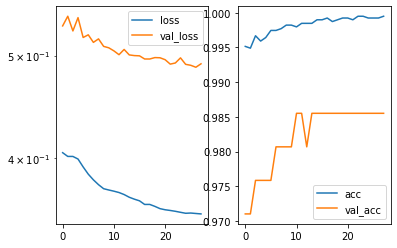

Predicted cell: Cells Probability: [[0.9999565]]
True Cell type: Cells
x [[0.51372606]]
True positional value x 0.4609375
y [[0.31858158]]
True positional value y 0.5


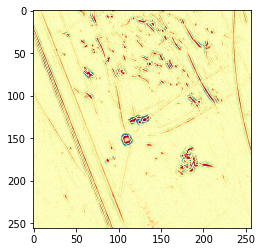

Epoch 29/250
3914/3914 [==============================] - 175s 45ms/step - loss: 0.3534 - acc: 0.9995 - val_loss: 0.4878 - val_acc: 0.9855

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.48776067699787123, 'val_acc': 0.9855072429214699, 'loss': 0.35338379079490273, 'acc': 0.9994890136747989, 'lr': 1e-06}


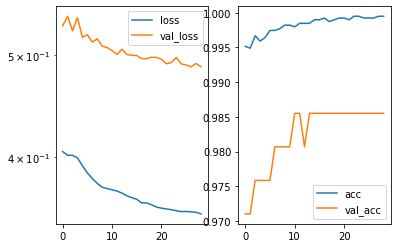

Predicted cell: Cells Probability: [[0.9991629]]
True Cell type: Cells
x [[0.34785143]]
True positional value x 0.4609375
y [[0.4553888]]
True positional value y 0.4609375


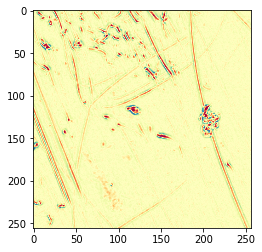

Epoch 30/250
3914/3914 [==============================] - 177s 45ms/step - loss: 0.3527 - acc: 0.9995 - val_loss: 0.4915 - val_acc: 0.9855

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4914551043280081, 'val_acc': 0.9855072429214699, 'loss': 0.35268529351109684, 'acc': 0.9994890136747989, 'lr': 1e-06}


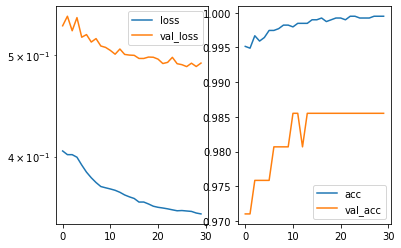

Predicted cell: Cells Probability: [[0.9999349]]
True Cell type: Cells
x [[0.3602081]]
True positional value x 0.5
y [[0.5293711]]
True positional value y 0.5390625


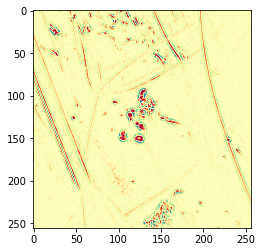

Epoch 31/250
3914/3914 [==============================] - 173s 44ms/step - loss: 0.3533 - acc: 0.9995 - val_loss: 0.4900 - val_acc: 0.9855

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.48999587781187415, 'val_acc': 0.9855072429214699, 'loss': 0.3532956274389063, 'acc': 0.9994890136747989, 'lr': 1e-06}


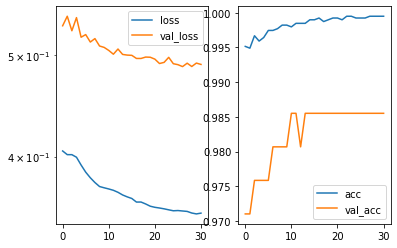

Predicted cell: Cells Probability: [[0.99996257]]
True Cell type: Cells
x [[0.58128476]]
True positional value x 0.4609375
y [[0.38448972]]
True positional value y 0.4609375


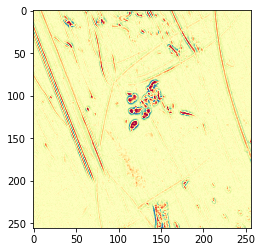

Epoch 32/250
3914/3914 [==============================] - 175s 45ms/step - loss: 0.3533 - acc: 0.9995 - val_loss: 0.4868 - val_acc: 0.9855

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.48679219164710114, 'val_acc': 0.9855072429214699, 'loss': 0.3533444097289396, 'acc': 0.9994890136747989, 'lr': 1e-06}


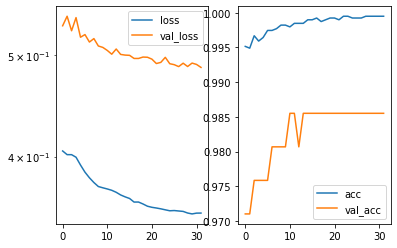

Predicted cell: Cells Probability: [[0.9747036]]
True Cell type: Cells
x [[0.56992096]]
True positional value x 0.4609375
y [[0.50489205]]
True positional value y 0.4609375


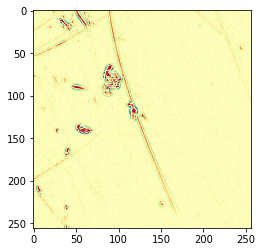

Epoch 33/250
3914/3914 [==============================] - 175s 45ms/step - loss: 0.3523 - acc: 0.9995 - val_loss: 0.4857 - val_acc: 0.9855

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4857103959949696, 'val_acc': 0.9855072429214699, 'loss': 0.35232412790728274, 'acc': 0.9994890136747989, 'lr': 1e-06}


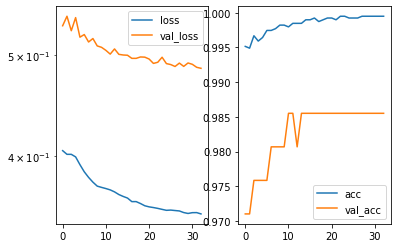

Predicted cell: Cells Probability: [[0.99762505]]
True Cell type: Cells
x [[0.4418765]]
True positional value x 0.5390625
y [[0.4609188]]
True positional value y 0.5


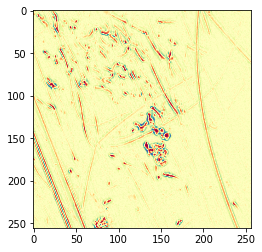

Epoch 34/250
3914/3914 [==============================] - 173s 44ms/step - loss: 0.3518 - acc: 1.0000 - val_loss: 0.4855 - val_acc: 0.9855

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4854904256293163, 'val_acc': 0.9855072429214699, 'loss': 0.3518008361315934, 'acc': 1.0, 'lr': 1e-06}


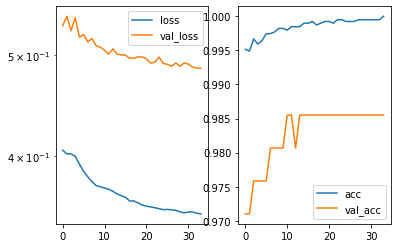

Predicted cell: Cells Probability: [[0.99555546]]
True Cell type: Cells
x [[0.51438993]]
True positional value x 0.4609375
y [[0.36184034]]
True positional value y 0.5


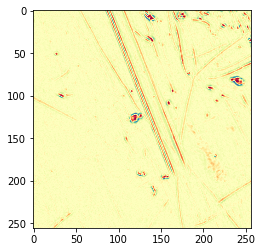

Epoch 35/250
3914/3914 [==============================] - 174s 44ms/step - loss: 0.3510 - acc: 0.9997 - val_loss: 0.4843 - val_acc: 0.9855

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.48430004384782577, 'val_acc': 0.9855072429214699, 'loss': 0.3509650656503259, 'acc': 0.9997445068373995, 'lr': 1e-06}


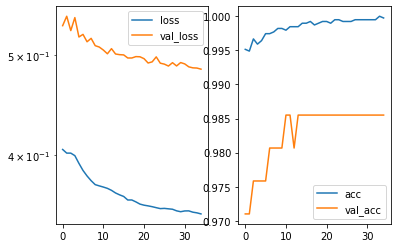

Predicted cell: Cells Probability: [[0.9963043]]
True Cell type: Cells
x [[0.5842976]]
True positional value x 0.5390625
y [[0.5173486]]
True positional value y 0.5390625


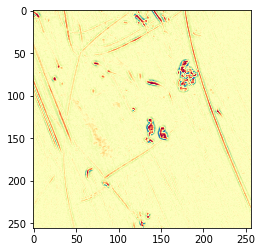

Epoch 36/250
3914/3914 [==============================] - 177s 45ms/step - loss: 0.3506 - acc: 0.9995 - val_loss: 0.4871 - val_acc: 0.9855

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.48713963791943976, 'val_acc': 0.9855072429214699, 'loss': 0.3505606854759922, 'acc': 0.9994890136747989, 'lr': 1e-06}


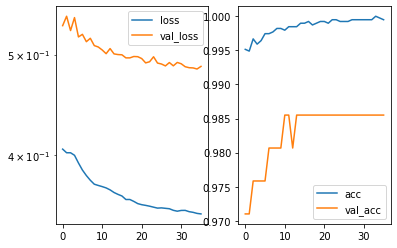

Predicted cell: Cells Probability: [[0.999438]]
True Cell type: Cells
x [[0.47120595]]
True positional value x 0.4609375
y [[0.29298094]]
True positional value y 0.5390625


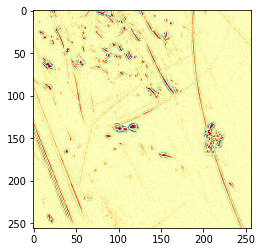

Epoch 37/250
3914/3914 [==============================] - 183s 47ms/step - loss: 0.3504 - acc: 0.9992 - val_loss: 0.4843 - val_acc: 0.9855

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4842614149989713, 'val_acc': 0.9855072429214699, 'loss': 0.35038701809969375, 'acc': 0.9992335205121984, 'lr': 1e-06}


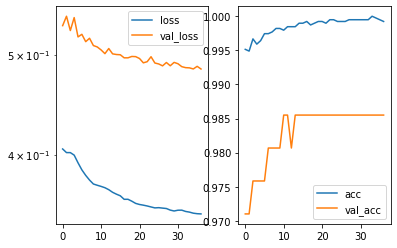

Predicted cell: Cells Probability: [[0.99712986]]
True Cell type: Cells
x [[0.503785]]
True positional value x 0.4609375
y [[0.3746524]]
True positional value y 0.5


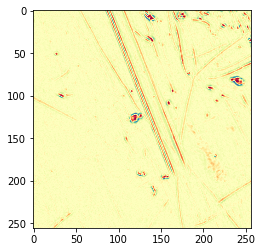

Epoch 38/250
3914/3914 [==============================] - 174s 45ms/step - loss: 0.3499 - acc: 0.9997 - val_loss: 0.4894 - val_acc: 0.9855

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38ExtraGRAND.h5
{'val_loss': 0.4893858822935445, 'val_acc': 0.9855072429214699, 'loss': 0.34994840832102586, 'acc': 0.9997445068373995, 'lr': 1e-06}


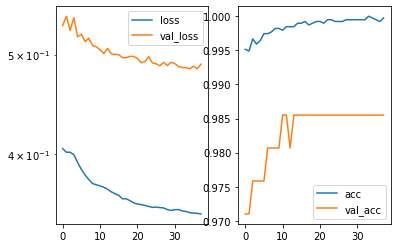

Predicted cell: Cells Probability: [[0.99991226]]
True Cell type: Cells
x [[0.58808285]]
True positional value x 0.5
y [[0.5970015]]
True positional value y 0.5


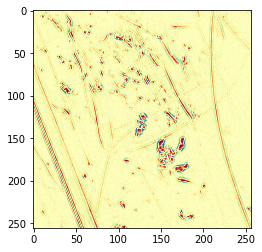

Epoch 39/250
 550/3914 [===>..........................] - ETA: 2:25 - loss: 0.3501 - acc: 1.0000

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
